# LINEAR REGRESSION ASSIGNMENT

# Data Understanding and Exlporation

In [568]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [569]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [570]:
#Importing dataset
bike = pd.read_csv('day.csv')

In [571]:
#Let's explore the top 5 rows
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [572]:
# Let's find out number of rows and columns
bike.shape

(730, 16)

In [573]:
# Lets find out the data types of each column
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [574]:
# Lets see some summary
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [575]:
# Dropping unnecessary columns

bike.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)

In [576]:
# Dropping the similar and therefore unnecessary variable 'holiday' due to its similarity with 'workingday'
bike.drop(['holiday'],axis=1,inplace=True)

In [577]:
bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


**Mapping the variables**

In [578]:
codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
bike['season'] = bike['season'].map(codes)

In [579]:
codes = {1:'Clear',2:'Cloudy',3:'Light snow rain',4:'Heavy snow rain'}
bike['weathersit'] = bike['weathersit'].map(codes)

In [580]:
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike['mnth'] = bike['mnth'].map(codes)

In [581]:
codes = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
bike['weekday'] = bike['weekday'].map(codes)

In [582]:
bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,Monday,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# EXPLORATORY DATA ANALYSIS

**Carrying out EDA using Data Visualization using 'cnt' as Target Variable**

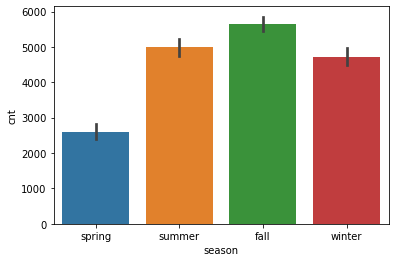

In [583]:
# 1. Season 
sns.barplot('season','cnt',data=bike)

Bike rentals tend to increase during fall season and least during the spring.

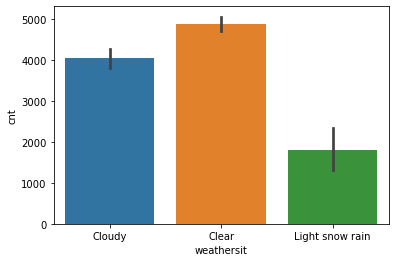

In [584]:
#2.Weathersit 
sns.barplot('weathersit','cnt',data=bike)

Bike rentals are maximum during clear or partly cloudy weather and minimum during Light snow rain

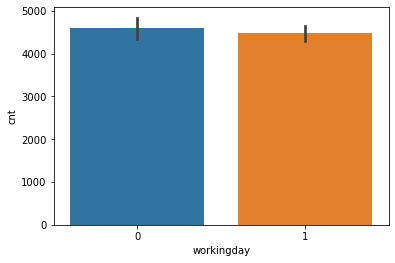

In [585]:
#3. Working day
sns.barplot('workingday','cnt',data=bike)

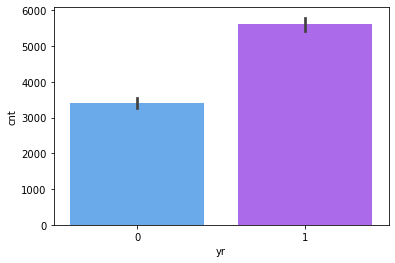

In [586]:
#4. Year- 0 : 2018 and 1 : 2019
sns.barplot('yr','cnt',data=bike,palette='cool')

Bike Rental popularity has increased in 2019 when compared to 2018

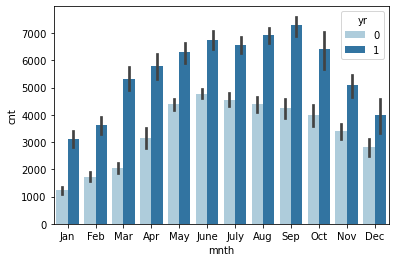

In [587]:
#5. Month - Jan to Dec 
sns.barplot('mnth','cnt',hue='yr',data=bike,palette='Paired')

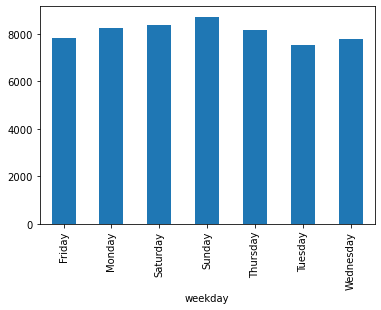

In [588]:
#6. Weekday
bike.groupby('weekday')['cnt'].max().plot(kind='bar')

Bike rentals are maximum on sunday and minimum on Tuesday

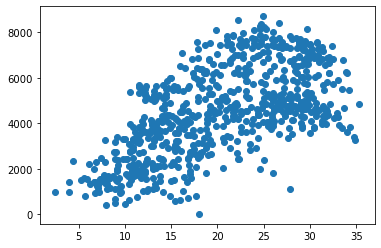

In [589]:
#7. Temp
plt.scatter('temp','cnt',data=bike)

Bike Rentals are observed at higher temperatures

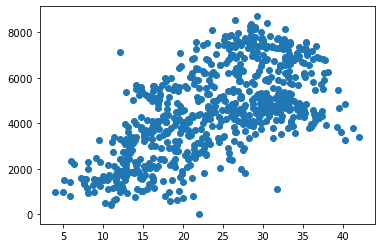

In [590]:
#8. atemp
plt.scatter('atemp','cnt',data=bike)

Bike Rentals are observed at higher "feel-like" temperatures

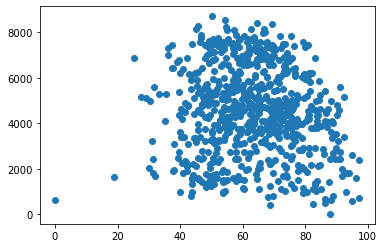

In [591]:
#9. Humidity
plt.scatter('hum','cnt',data=bike)

Bike Rentals are observed at higher humidity

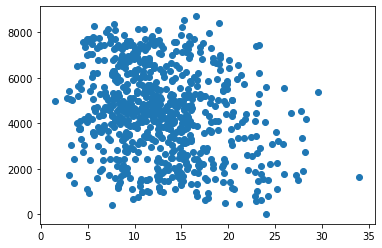

In [592]:
#10. Windspeed
plt.scatter('windspeed','cnt',data=bike)

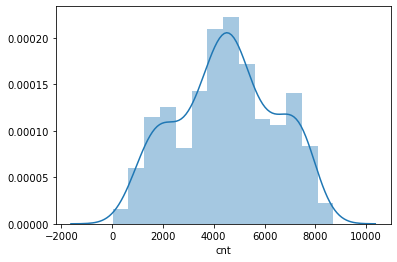

In [593]:
sns.distplot(bike['cnt'])

**Visualizing Relationship among variables**

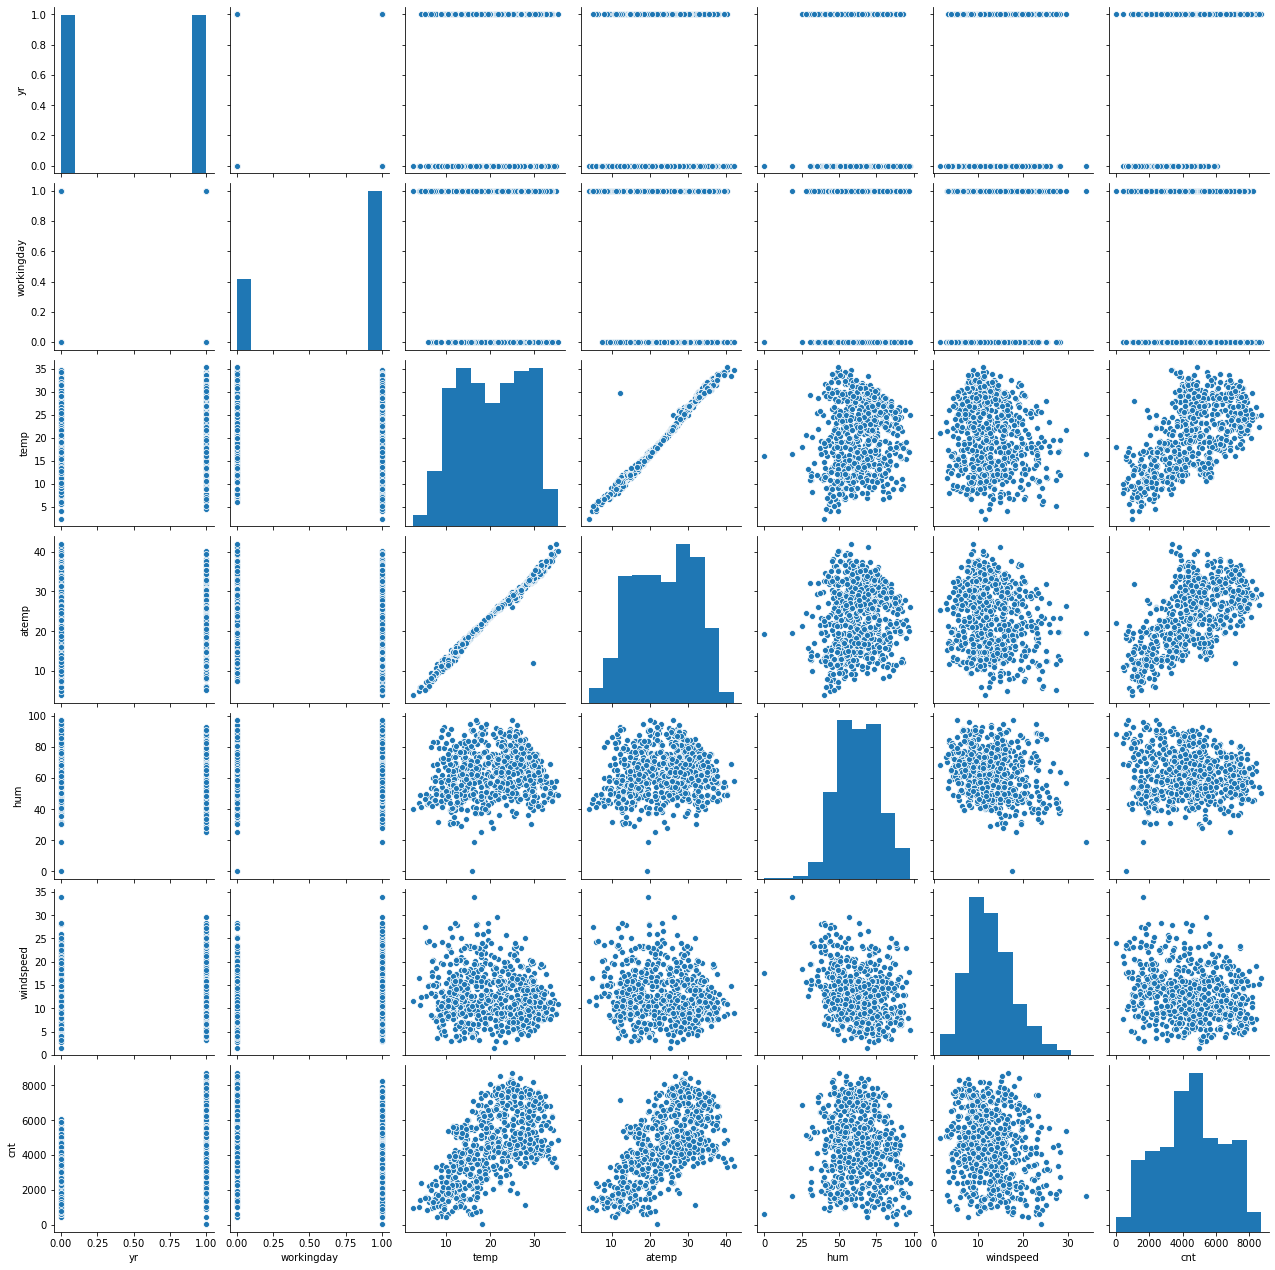

In [594]:
sns.pairplot(bike)

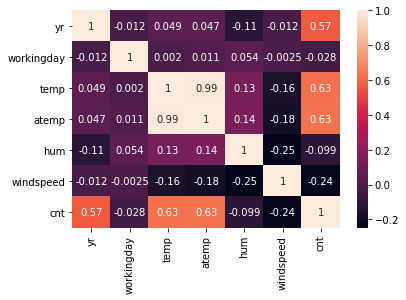

In [595]:
sns.heatmap(bike.corr(),annot=True)

In [596]:
# It can be seen that atemp and temp are highly correlated and therefore dropping 'atemp' variable to avoid multicollinearity.
bike.drop('atemp',axis=1,inplace=True)


**Creating dummy variables for categorical features**

In [597]:
seasons = pd.get_dummies(bike['season'])

In [598]:
month = pd.get_dummies(bike['mnth'])

In [599]:
week_day = pd.get_dummies(bike['weekday'])

In [600]:
weather = pd.get_dummies(bike['weathersit'])

In [601]:
bike = pd.concat([bike,seasons,month,week_day,weather],axis=1)

In [602]:
pd.options.display.max_columns = None

In [603]:
bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt,fall,spring,summer,winter,Apr,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,Cloudy,Light snow rain
0,spring,0,Jan,Monday,1,Cloudy,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,spring,0,Jan,Tuesday,1,Cloudy,14.902598,69.6087,16.652113,801,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,spring,0,Jan,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,spring,0,Jan,Thursday,1,Clear,8.200000,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,spring,0,Jan,Friday,1,Clear,9.305237,43.6957,12.522300,1600,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [604]:
bike.shape

(730, 36)

In [605]:
# Dropping the categorical variables after dummy encoding them
bike.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)

In [606]:
bike.head()

,yr,workingday,temp,hum,windspeed,cnt,fall,spring,summer,winter,Apr,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,Cloudy,Light snow rain
0,0,1,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,1,14.902598,69.6087,16.652113,801,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,1,8.050924,43.7273,16.636703,1349,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0,1,8.200000,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,1,9.305237,43.6957,12.522300,1600,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


 **Splitting the Data into Training and Testing Sets**

In [607]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

**Rescaling the Features**

We will use Standard scaling.

In [608]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [609]:
# Applying scalers to all columns except the 'binary' and 'dummy' variables
num_vars = ['temp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,workingday,temp,hum,windspeed,cnt,fall,spring,summer,winter,Apr,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,Cloudy,Light snow rain
653,1,1,-0.121335,-0.514725,-0.117752,1.562685,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
576,1,1,1.231731,0.516433,-0.330615,1.399629,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
426,1,0,-0.420478,-0.069854,-0.385694,-0.215554,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
728,1,1,-1.294913,-1.045032,2.018143,-1.379511,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,-0.627580,-1.000840,-0.779889,-0.136589,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


**Dividing into X and Y sets for the model building**

In [610]:
y_train = df_train.pop('cnt')
X_train = df_train

# DATA MODELLING AND EVALUATION

**Building our Model**

This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

**RFE**

Recursive feature elimination

In [611]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [612]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)    # running RFE
rfe = rfe.fit(X_train, y_train)

In [613]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', False, 6),
 ('windspeed', False, 4),
 ('fall', False, 3),
 ('spring', True, 1),
 ('summer', False, 10),
 ('winter', True, 1),
 ('Apr', False, 17),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 15),
 ('Mar', False, 16),
 ('May', False, 5),
 ('Nov', True, 1),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Friday', False, 12),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 13),
 ('Tuesday', False, 7),
 ('Wednesday', False, 11),
 ('Clear', True, 1),
 ('Cloudy', True, 1),
 ('Light snow rain', True, 1)]

In [614]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'spring', 'winter', 'Dec', 'Jan', 'July',
       'Nov', 'Sep', 'Saturday', 'Sunday', 'Clear', 'Cloudy',
       'Light snow rain'],
      dtype='object')

**Building model using statsmodel, for the detailed statistics**

In [615]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [616]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [617]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [618]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     168.6
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          4.91e-178
Time:                        23:01:00   Log-Likelihood:                -276.81
No. Observations:                 510   AIC:                             583.6
Df Residuals:                     495   BIC:                             647.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9297      0.105     

In [619]:
#Dropping 'Cloudy' as it is insignificant
X_train1 = X_train_rfe.drop('Cloudy',1)

In [620]:
X_train2 = sm.add_constant(X_train1)
lm1 = sm.OLS(y_train,X_train2).fit()

In [621]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     168.6
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          4.91e-178
Time:                        23:01:02   Log-Likelihood:                -276.81
No. Observations:                 510   AIC:                             583.6
Df Residuals:                     495   BIC:                             647.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.0223      0.138     -7.381      0.000      -1.294      -0.750
yr                  1.0433      0.038     27.582      0.000       0.969       1.118
workingday          0.3655      0.131      2.800      0.005       0.109       0.622
temp                0.4357      0.033     13.035      0.000       0.370       0.501
spring             -0.4806      0.072     -6.654      0.000      -0.623      -0.339
winter              0.3326      0.065      5.109      0.000       0.205       0.461
Dec                -0.1848      0.080     -2.299      0.022      -0.343      -0.027
Jan                -0.1696      0.083     -2.036      0.042      -0.333      -0.006
July               -0.2798      0.080     -3.485      0.001      -0.438      -0.122
Nov                -0.2382      0.087     -2.749      0.006      -0.408      -0.068
Sep                 0.2731      0.072      3.767      0.000       0.131       0.416
Saturday            0.4475      0.139      3.225      0.001       0.175       0.720
Sunday              0.4584      0.138      3.311      0.001       0.186       0.730
Clear               0.3598      0.040      8.894      0.000       0.280       0.439
Light snow rain    -1.0120      0.115     -8.773      0.000      -1.239      -0.785
==============================================================================
Omnibus:                       85.320   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.464
Skew:                          -0.823   Prob(JB):                     1.49e-50
Kurtosis:                       5.844   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [622]:
#Dropping 'Jan' as it seems insignificant
X_train2 = X_train1.drop('Jan',1)

In [623]:
X_train3 = sm.add_constant(X_train2)
lm2 = sm.OLS(y_train,X_train3).fit()

In [624]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     180.1
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          2.80e-178
Time:                        23:01:06   Log-Likelihood:                -278.94
No. Observations:                 510   AIC:                             585.9
Df Residuals:                     496   BIC:                             645.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.0387      0.139     -7.489      0.000      -1.311      -0.766
yr                  1.0408      0.038     27.443      0.000       0.966       1.115
workingday          0.3707      0.131      2.831      0.005       0.113       0.628
temp                0.4540      0.032     14.061      0.000       0.391       0.517
spring             -0.5161      0.070     -7.340      0.000      -0.654      -0.378
winter              0.3348      0.065      5.126      0.000       0.206       0.463
Dec                -0.1491      0.079     -1.895      0.059      -0.304       0.006
July               -0.2969      0.080     -3.706      0.000      -0.454      -0.140
Nov                -0.2189      0.086     -2.533      0.012      -0.389      -0.049
Sep                 0.2699      0.073      3.713      0.000       0.127       0.413
Saturday            0.4509      0.139      3.240      0.001       0.177       0.724
Sunday              0.4648      0.139      3.348      0.001       0.192       0.738
Clear               0.3634      0.041      8.963      0.000       0.284       0.443
Light snow rain    -0.9956      0.115     -8.625      0.000      -1.222      -0.769
==============================================================================
Omnibus:                       81.475   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.602
Skew:                          -0.791   Prob(JB):                     9.24e-48
Kurtosis:                       5.773   Cond. No.                         22.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [625]:
#Dropping 'Dec' as it seems insignificant
X_train3 = X_train2.drop('Dec',1)

In [626]:
X_train4 = sm.add_constant(X_train3)
lm3 = sm.OLS(y_train,X_train4).fit()

In [627]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     193.8
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.17e-178
Time:                        23:01:08   Log-Likelihood:                -280.78
No. Observations:                 510   AIC:                             587.6
Df Residuals:                     497   BIC:                             642.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.0504      0.139     -7.561      0.000      -1.323      -0.777
yr                  1.0419      0.038     27.405      0.000       0.967       1.117
workingday          0.3754      0.131      2.861      0.004       0.118       0.633
temp                0.4665      0.032     14.715      0.000       0.404       0.529
spring             -0.5097      0.070     -7.238      0.000      -0.648      -0.371
winter              0.2910      0.061      4.752      0.000       0.171       0.411
July               -0.3058      0.080     -3.814      0.000      -0.463      -0.148
Nov                -0.1591      0.081     -1.973      0.049      -0.318      -0.001
Sep                 0.2790      0.073      3.836      0.000       0.136       0.422
Saturday            0.4535      0.140      3.250      0.001       0.179       0.728
Sunday              0.4650      0.139      3.341      0.001       0.192       0.739
Clear               0.3611      0.041      8.887      0.000       0.281       0.441
Light snow rain    -0.9818      0.116     -8.500      0.000      -1.209      -0.755
==============================================================================
Omnibus:                       76.361   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.373
Skew:                          -0.761   Prob(JB):                     1.69e-42
Kurtosis:                       5.596   Cond. No.                         22.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [628]:
#Dropping 'Nov' as it seems insignificant
X_train4 = X_train3.drop('Nov',1)

In [629]:
X_train5 = sm.add_constant(X_train4)
lm4 = sm.OLS(y_train,X_train5).fit()

In [630]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     209.8
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          5.42e-179
Time:                        23:01:13   Log-Likelihood:                -282.77
No. Observations:                 510   AIC:                             589.5
Df Residuals:                     498   BIC:                             640.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.0702      0.139     -7.701      0.000      -1.343      -0.797
yr                  1.0417      0.038     27.320      0.000       0.967       1.117
workingday          0.3910      0.131      2.976      0.003       0.133       0.649
temp                0.4744      0.032     15.046      0.000       0.412       0.536
spring             -0.4946      0.070     -7.045      0.000      -0.632      -0.357
winter              0.2443      0.057      4.313      0.000       0.133       0.356
July               -0.3109      0.080     -3.868      0.000      -0.469      -0.153
Sep                 0.2899      0.073      3.986      0.000       0.147       0.433
Saturday            0.4663      0.140      3.336      0.001       0.192       0.741
Sunday              0.4854      0.139      3.487      0.001       0.212       0.759
Clear               0.3577      0.041      8.786      0.000       0.278       0.438
Light snow rain    -0.9751      0.116     -8.421      0.000      -1.203      -0.748
==============================================================================
Omnibus:                       74.215   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.164
Skew:                          -0.751   Prob(JB):                     4.58e-40
Kurtosis:                       5.504   Cond. No.                         21.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**All the variables have p-value less than 0.02.**

In [631]:
X_train_new = X_train5.drop(["const"], axis = 1)

**Calculating the Variance Inflation Factor (VIF) for the model**

In [632]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,4.17
3,spring,3.19
9,Clear,2.79
2,temp,2.77
4,winter,2.15
0,yr,2.03
8,Sunday,1.56
7,Saturday,1.54
5,July,1.39
6,Sep,1.17


**All the variables have VIF less than 5 which is desirable**

# Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [633]:
y_train_pred = lm4.predict(X_train5)

Text(0.5, 0, 'Errors')

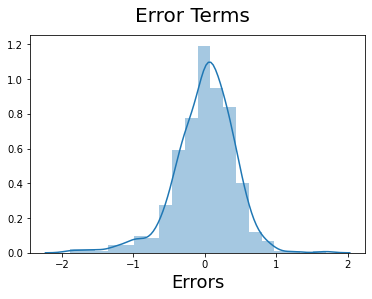

In [634]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)       

**Making Predictions**

Applying the scaling on the test sets

In [635]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

**Dividing into X_test and y_test**

In [636]:
y_test = df_test.pop('cnt')
X_test = df_test

In [637]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [638]:
# Making predictions
y_pred = lm4.predict(X_test_new)

# Model Evaluation

Text(0, 0.5, 'y_pred')

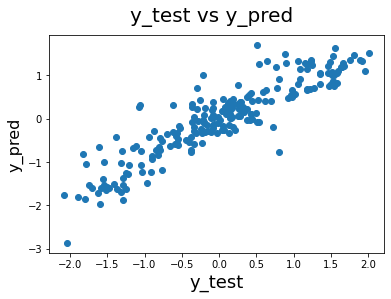

In [639]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [640]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8120089717890486

# CONCLUSION

The top variables that are seen affecting and benefitting the Bike rental Count are :-
1.Spring Season
2.Working day
3.Sun
4.Temperature
5.Clear weather
6.July month


Assumptions of Linear Regression:
1.The error terms are normally distributed.
2.The training and testing accuracy are nearly equal hence there is no Overfit/Underfit situation.
3.The predicted values have linear relationship with the actual values